# **CREDIT CARD FRAUD DETECTION**

Build a model to detect fraudulent credit card transactions. Use a dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees,or Random Forests to classify transactions as fraudulent or legitimate.

## Installing the necessary Libraries and Importing required Modules.

In [2]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from plotly.subplots import make_subplots
import plotly.io as pio
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import joblib

# Additional imports
from sklearn.tree import plot_tree
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from collections import Counter
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler

# Display settings
from IPython.display import Image

In [4]:
%matplotlib inline

rcParams['figure.figsize'] = 15, 10

# Define labels for fraud classes
labels = ["Genuine", "Fraud"]

## Reading and Exploring the Dataset.

In [5]:
# Reading csv files and drop the first column
train_path = '/content/drive/MyDrive/Transctions/fraudTrain.csv'
transaction_df = pd.read_csv(train_path)
transaction_df.drop(transaction_df.columns[0], axis=1, inplace=True)
# Read the text file into a Pandas DataFrame
test_path = '/content/drive/MyDrive/Transctions/fraudTest.csv'
df_test = pd.read_csv(test_path)
df_test.drop(df_test.columns[0], axis=1, inplace=True)
# Display the first few rows of the DataFrame
transaction_df.head().T

,0,1,2,3,4
trans_date_trans_time,2019-01-01 00:00:18,2019-01-01 00:00:44,2019-01-01 00:00:51,2019-01-01 00:01:16,2019-01-01 00:03:06
cc_num,2703186189652095,630423337322,38859492057661,3534093764340240,375534208663984
merchant,"fraud_Rippin, Kub and Mann","fraud_Heller, Gutmann and Zieme",fraud_Lind-Buckridge,"fraud_Kutch, Hermiston and Farrell",fraud_Keeling-Crist
category,misc_net,grocery_pos,entertainment,gas_transport,misc_pos
amt,4.97,107.23,220.11,45.0,41.96
first,Jennifer,Stephanie,Edward,Jeremy,Tyler
last,Banks,Gill,Sanchez,White,Garcia
gender,F,F,M,M,M
street,561 Perry Cove,43039 Riley Greens Suite 393,594 White Dale Suite 530,9443 Cynthia Court Apt. 038,408 Bradley Rest
city,Moravian Falls,Orient,Malad City,Boulder,Doe Hill


In [6]:
# Explore the dataset
transaction_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
# Display information about the dataset
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

## Data Visualization and Data Analysis

In [8]:
# Pie chart for fraud vs genuine transactions
fraud_or_not = transaction_df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=transaction_df['is_fraud'].value_counts(), names=labels, width=700, height=400,
             color_discrete_sequence=["blue", "red"], title="Fraud vs Genuine transactions")

fig.update_layout(
    title_text="Amount per transaction by Class",
    title_font_color="white",
    legend_title_font_color="white",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

In [9]:
# Check for missing values and remove rows with missing values
transaction_df.isnull().values.any()
# Remove rows with missing values
transaction_df_no_missing_rows = transaction_df.dropna(axis=0)

In [10]:
# Create a copy of the DataFrame
new_df = transaction_df_no_missing_rows.copy()
# Drop duplicates
new_df.drop_duplicates(inplace=True)

In [11]:
# Convert 'unix_time' to datetime and extract additional features
new_df['unix_time'] = new_df['unix_time'].apply(datetime.utcfromtimestamp)
new_df['trans_hour'] = new_df['unix_time'].dt.hour.astype(int)
new_df['trans_day'] = new_df['unix_time'].dt.dayofweek.astype(int)
new_df['trans_month'] = new_df['unix_time'].dt.month.astype(int)
new_df['trans_year'] = new_df['unix_time'].dt.year.astype(int)

In [12]:
new_df["trans_date"] = pd.to_datetime(new_df["trans_date_trans_time"], infer_datetime_format=True)
new_df["dob"] = pd.to_datetime(new_df["dob"], infer_datetime_format=True)

new_df["age"] = (new_df["trans_date"] - new_df["dob"]) / np.timedelta64(1, 'Y')

new_df["age"] = new_df["age"].astype(int)
# Display the information about the DataFrame
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  object        
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [13]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  # Radius of Earth in kilometers

    return distance

# Apply the haversine function to calculate distances
new_df['distance'] = new_df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)


In [14]:
# Drop unnecessary columns
drop_cols = ['trans_date_trans_time', 'trans_date', 'city', 'unix_time', 'lat', 'long', 'street', 'dob', 'merch_lat', 'merch_long', 'state', 'first', 'last']
df_transformed = new_df.drop(drop_cols, axis=1)
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   cc_num       1296675 non-null  int64  
 1   merchant     1296675 non-null  object 
 2   category     1296675 non-null  object 
 3   amt          1296675 non-null  float64
 4   gender       1296675 non-null  object 
 5   zip          1296675 non-null  int64  
 6   city_pop     1296675 non-null  int64  
 7   job          1296675 non-null  object 
 8   trans_num    1296675 non-null  object 
 9   is_fraud     1296675 non-null  int64  
 10  trans_hour   1296675 non-null  int64  
 11  trans_day    1296675 non-null  int64  
 12  trans_month  1296675 non-null  int64  
 13  trans_year   1296675 non-null  int64  
 14  age          1296675 non-null  int64  
 15  distance     1296675 non-null  float64
dtypes: float64(2), int64(9), object(5)
memory usage: 168.2+ MB


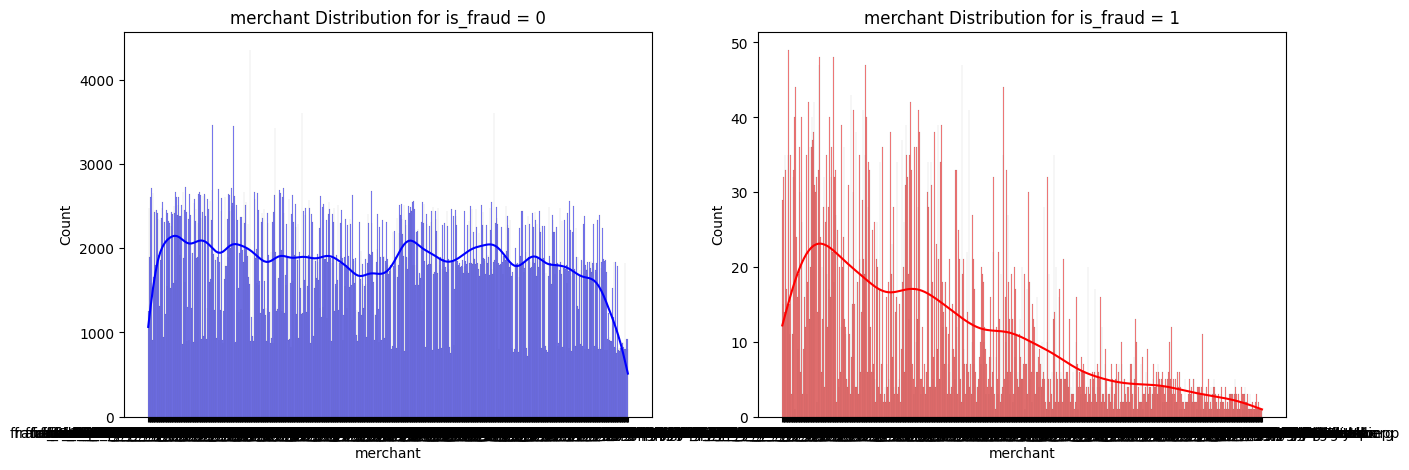

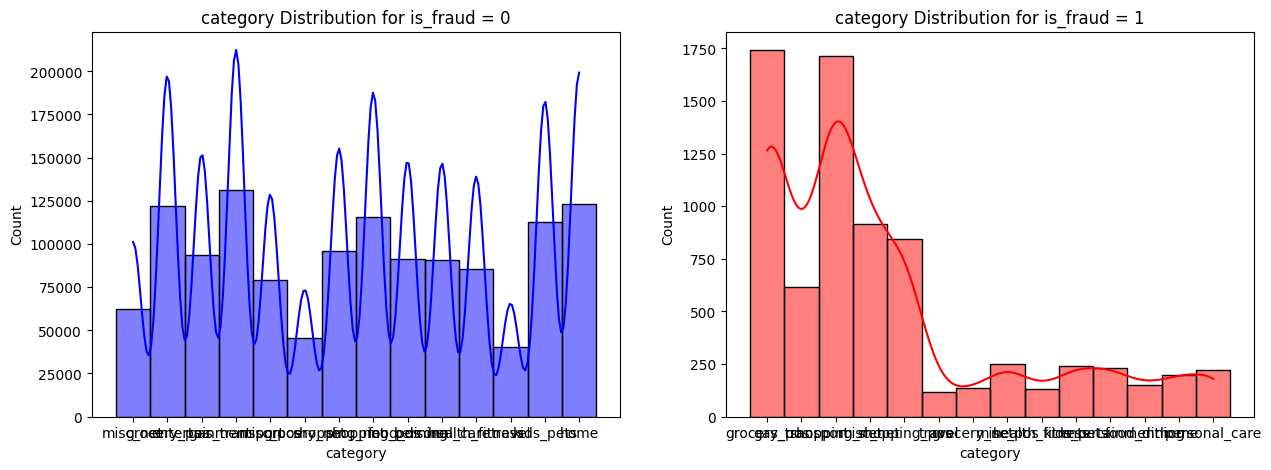

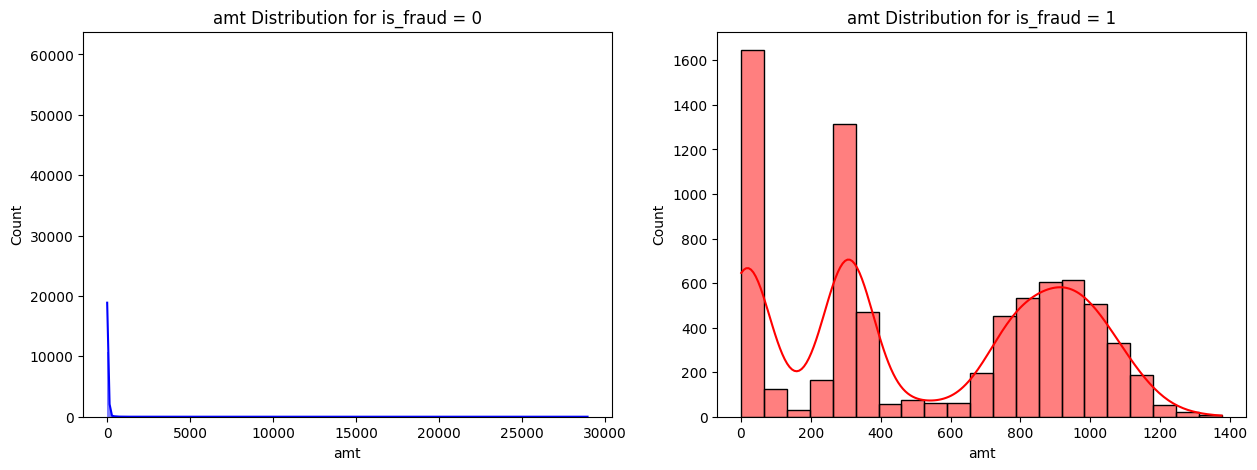

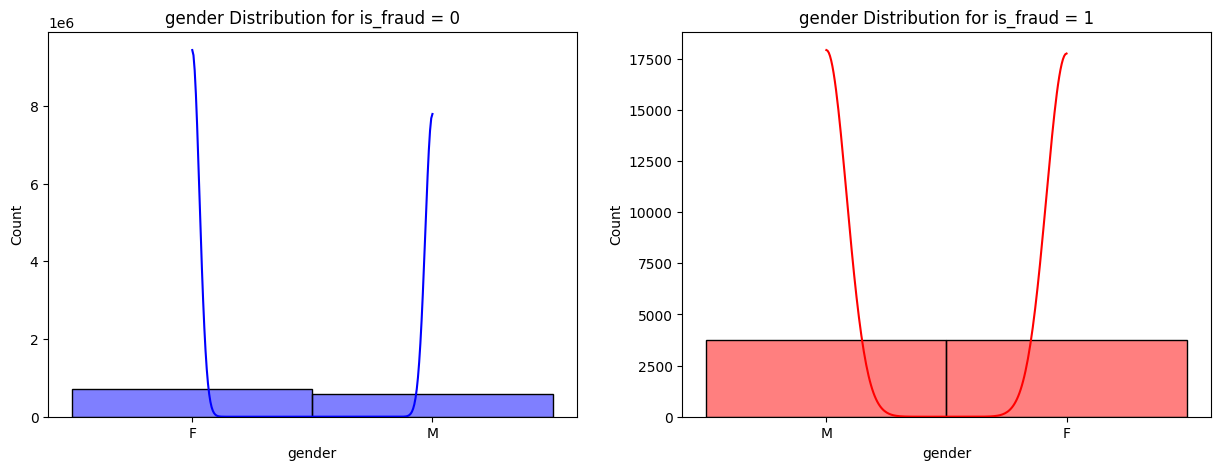

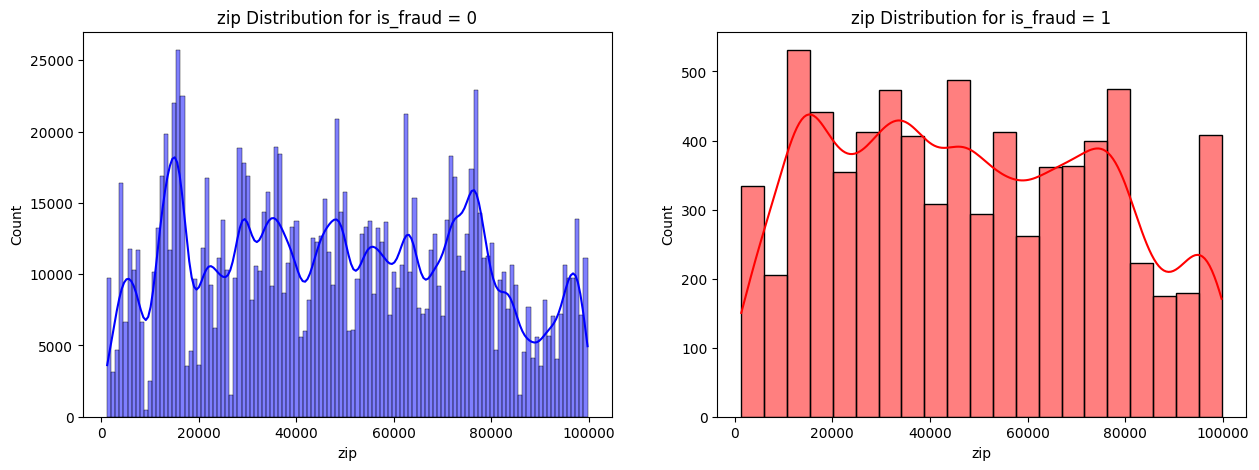

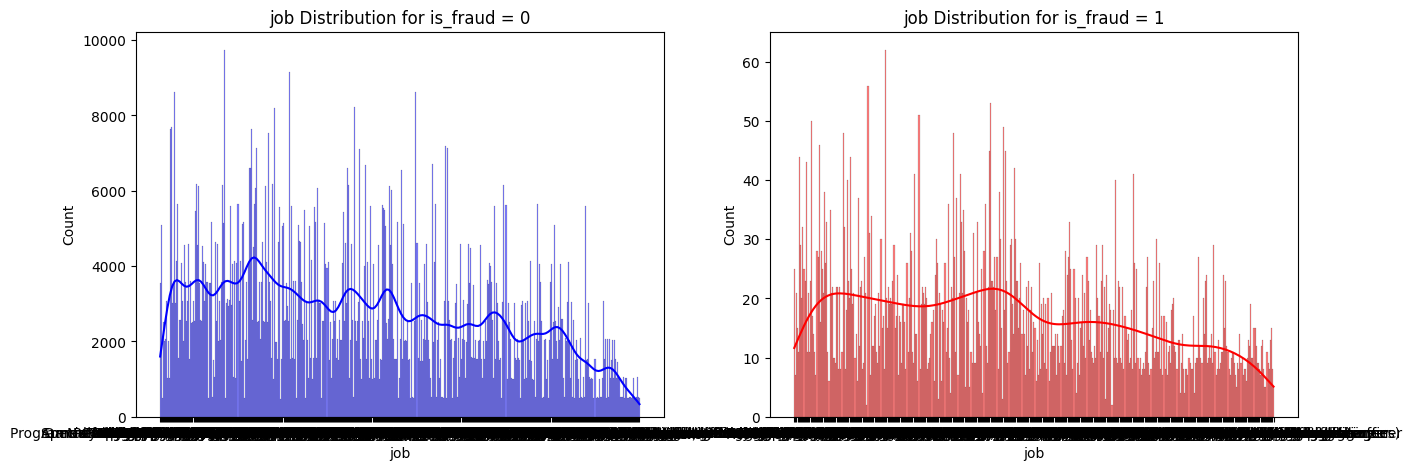

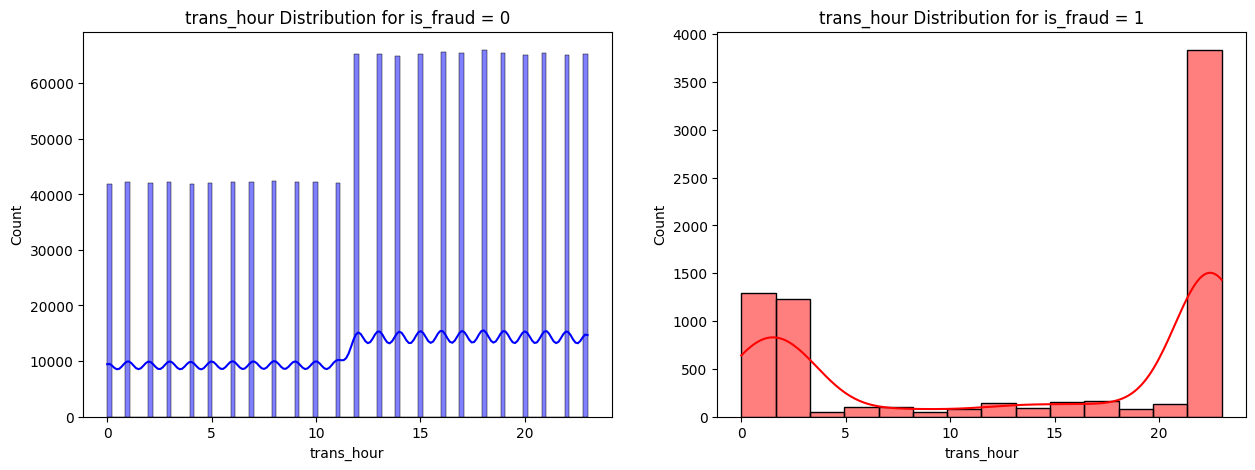

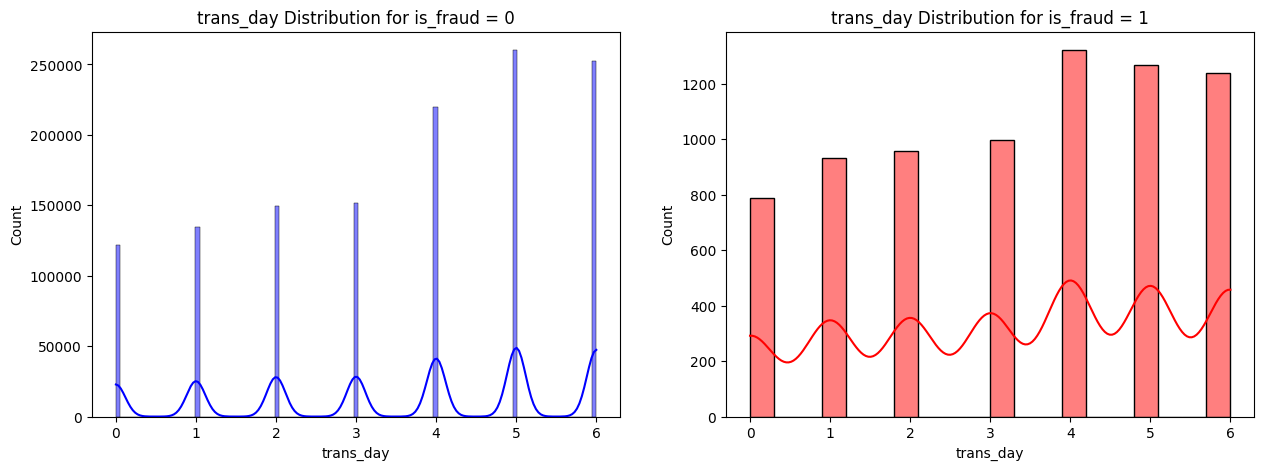

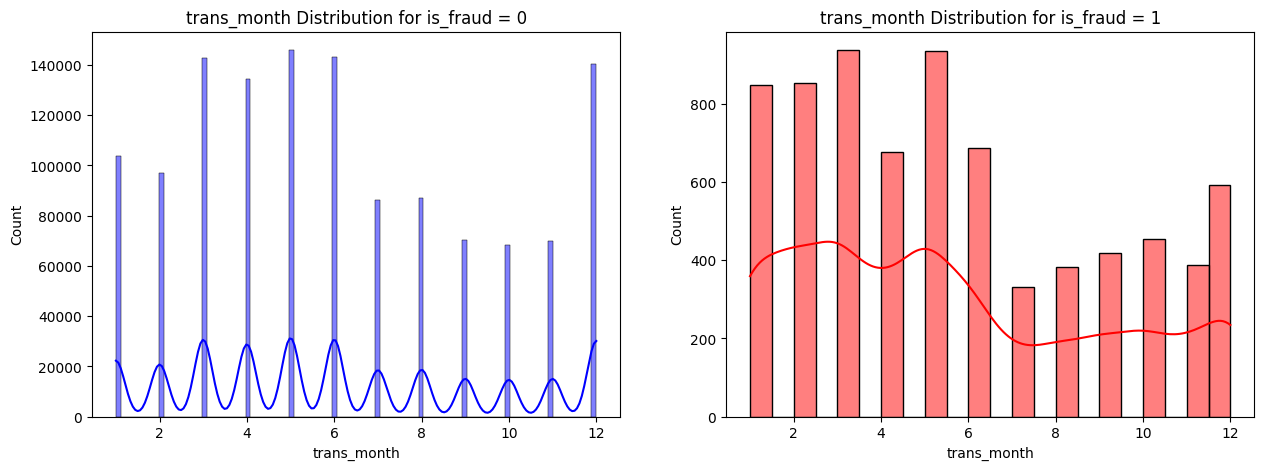

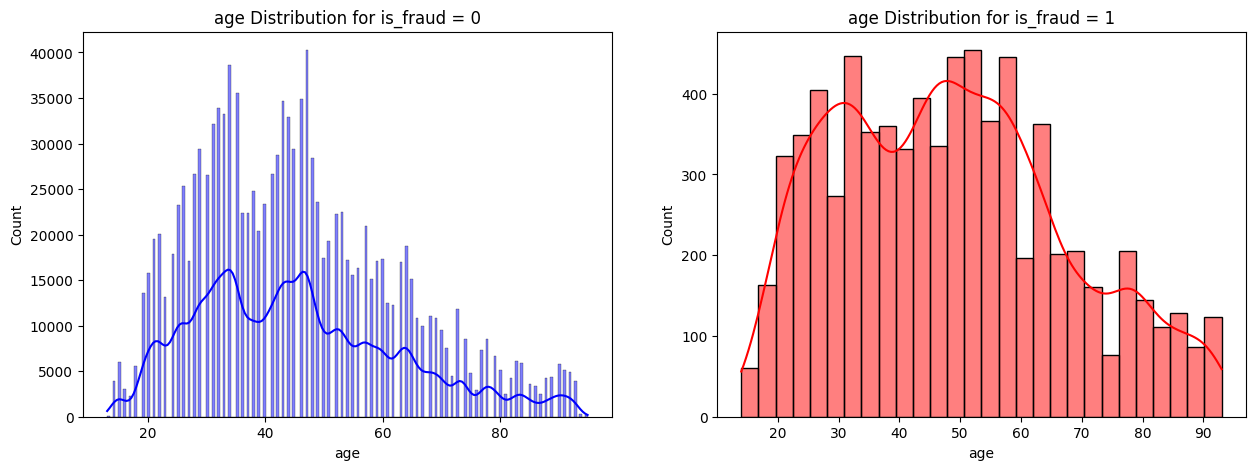

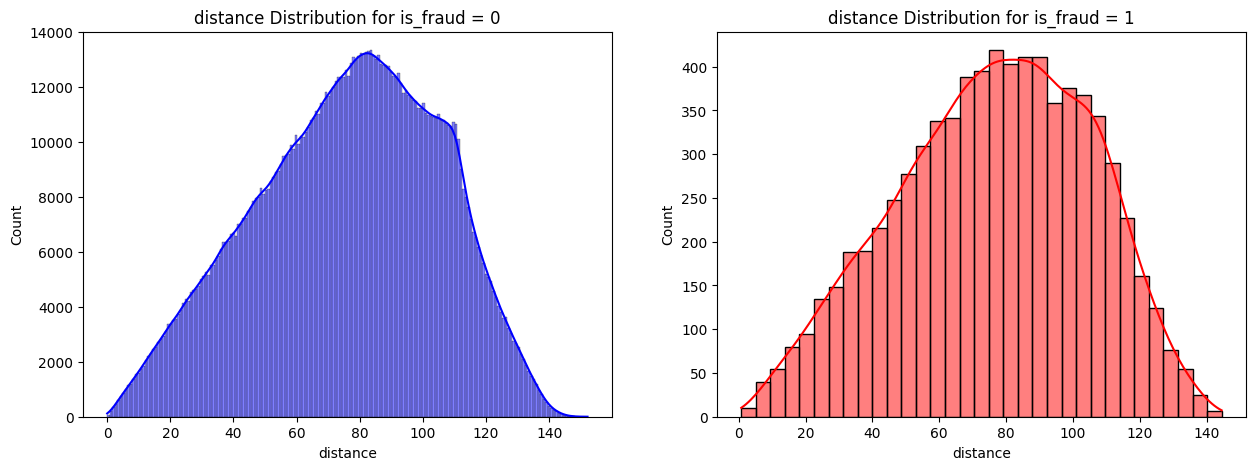

In [15]:
def visualize_feature_distribution(df, feature, target='is_fraud'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    sns.histplot(df[df[target] == 0][feature], kde=True, ax=axes[0], color='blue', label=f'{target} = 0')
    axes[0].set_title(f'{feature} Distribution for {target} = 0')

    sns.histplot(df[df[target] == 1][feature], kde=True, ax=axes[1], color='red', label=f'{target} = 1')
    axes[1].set_title(f'{feature} Distribution for {target} = 1')

    plt.show()

# Assuming df_transformed is your DataFrame
cols1 = ['merchant', 'category', 'amt', 'gender', 'zip', 'job', 'trans_hour', 'trans_day', 'trans_month', 'age', 'distance']
for column in cols1:
    visualize_feature_distribution(df_transformed, column)

## **Convert the values in each column of the DataFrame into numerical labels.**

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA

def convert_categorical_to_numeric(df, columns):
    # Convert categorical columns to numeric using OrdinalEncoder
    enc = OrdinalEncoder(dtype=np.int64)
    enc.fit(df[columns])
    df[columns] = enc.transform(df[columns])

def identify_cardinality_columns(df, threshold=20):
    # Identify high and low cardinality columns
    n_unique = df.nunique()
    low_cardinality_columns = n_unique[n_unique <= threshold].index
    high_cardinality_columns = n_unique[n_unique > threshold].index

    print(f"The high cardinality columns are: {high_cardinality_columns}")
    print(f"The low cardinality columns are: {low_cardinality_columns}")

    return low_cardinality_columns, high_cardinality_columns

def label_encode_low_cardinality_columns(df, columns):
    # Convert object columns to numeric using label encoding
    for column in columns:
        if df[column].dtype == 'object':
            df[column] = df[column].astype('category').cat.codes

def apply_frequency_encoding(df, columns):
    # Apply frequency encoding to columns with high cardinality
    for column in columns:
        df[column] = df.groupby(column)[column].transform('count')

def apply_pca(df, n_components=2):
    # Apply PCA for dimensionality reduction
    numerical_features = df.select_dtypes(include='number')
    scaler = StandardScaler()
    numerical_features_standardized = scaler.fit_transform(numerical_features)
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(numerical_features_standardized)
    df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i + 1}' for i in range(n_components)])
    df = pd.concat([df, df_pca], axis=1)

    return df

In [17]:
# Convert categorical columns to numeric
convert_categorical_to_numeric(df_transformed, ['category', 'merchant', 'job'])

In [18]:
# Identify high and low cardinality columns
low_cardinality_columns, high_cardinality_columns = identify_cardinality_columns(df_transformed)

The high cardinality columns are: Index(['cc_num', 'merchant', 'amt', 'zip', 'city_pop', 'job', 'trans_num',
       'trans_hour', 'age', 'distance'],
      dtype='object')
The low cardinality columns are: Index(['category', 'gender', 'is_fraud', 'trans_day', 'trans_month',
       'trans_year'],
      dtype='object')


In [19]:
# Apply label encoding to low cardinality columns
label_encode_low_cardinality_columns(df_transformed, low_cardinality_columns)

In [20]:
# Apply frequency encoding to high cardinality columns
apply_frequency_encoding(df_transformed, high_cardinality_columns)

In [21]:
# Apply PCA for dimensionality reduction
df_transformed = apply_pca(df_transformed)

In [22]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   cc_num       1296675 non-null  int64  
 1   merchant     1296675 non-null  int64  
 2   category     1296675 non-null  int64  
 3   amt          1296675 non-null  int64  
 4   gender       1296675 non-null  int8   
 5   zip          1296675 non-null  int64  
 6   city_pop     1296675 non-null  int64  
 7   job          1296675 non-null  int64  
 8   trans_num    1296675 non-null  int64  
 9   is_fraud     1296675 non-null  int64  
 10  trans_hour   1296675 non-null  int64  
 11  trans_day    1296675 non-null  int64  
 12  trans_month  1296675 non-null  int64  
 13  trans_year   1296675 non-null  int64  
 14  age          1296675 non-null  int64  
 15  distance     1296675 non-null  int64  
 16  PC1          1296675 non-null  float64
 17  PC2          1296675 non-null  float64
dtypes:

In [23]:
df_transformed.head().T

,0,1,2,3,4
cc_num,2028.000000,3030.000000,503.00000,493.000000,2017.000000
merchant,1267.000000,2503.000000,1895.00000,2613.000000,1592.000000
category,8.000000,4.000000,0.00000,2.000000,9.000000
amt,352.000000,33.000000,3.00000,87.000000,63.000000
gender,0.000000,0.000000,1.00000,1.000000,1.000000
zip,2028.000000,3030.000000,503.00000,493.000000,2017.000000
city_pop,2028.000000,3040.000000,503.00000,493.000000,2518.000000
job,3545.000000,5099.000000,511.00000,2530.000000,2017.000000
trans_num,1.000000,1.000000,1.00000,1.000000,1.000000
is_fraud,0.000000,0.000000,0.00000,0.000000,0.000000


## Checking Correlations
Identify features that are most strongly correlated or informative with respect to the target variable ("is_fraud"), using correlation analysis.

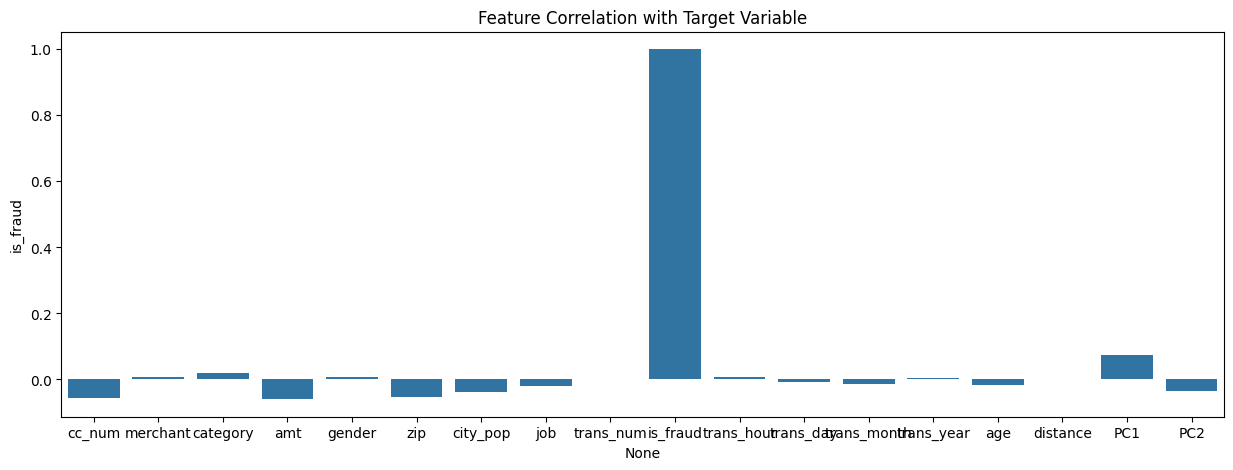

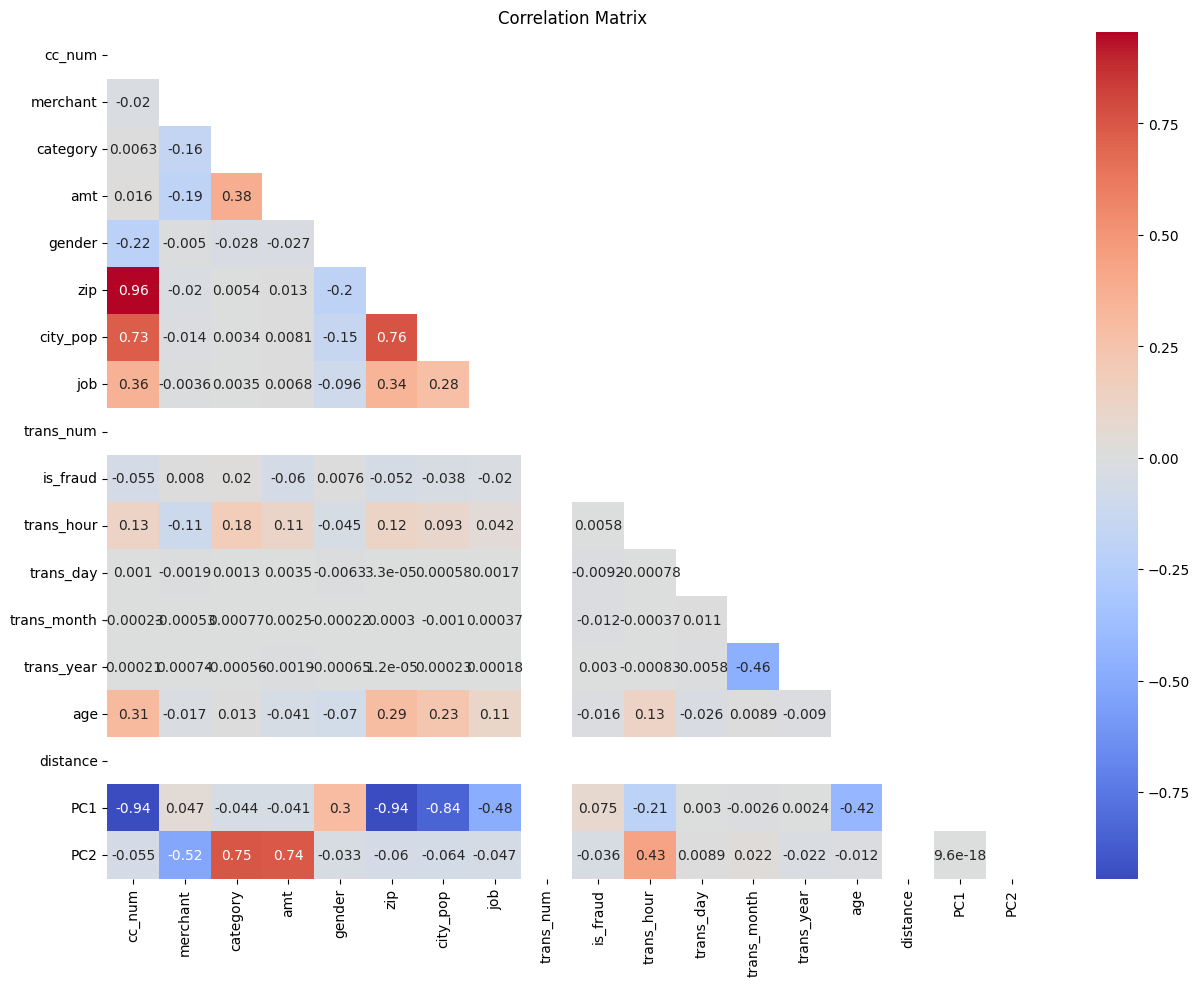

Selected top 12 correlated features: Index(['PC1', 'category', 'merchant', 'gender', 'trans_hour', 'trans_year',
       'trans_day', 'trans_month', 'age', 'job', 'PC2', 'city_pop'],
      dtype='object')


In [24]:
def plot_target_correlation(df):
    # Calculate correlation with the target variable
    df_corr = df.corr()['is_fraud'].to_frame()
    # Plot bar chart for feature correlations with target variable
    plt.figure(figsize=(15, 5))
    sns.barplot(data=df_corr, x=df_corr.index, y='is_fraud')
    plt.title('Feature Correlation with Target Variable')
    plt.show()

def plot_correlation_matrix(df):
    # Calculate correlation matrix
    corr_matrix = df.corr()
    # Create a mask to hide the upper triangle for better visualization
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    # Plot the correlation matrix heatmap
    f, ax = plt.subplots(figsize=(15, 11))
    sns.heatmap(corr_matrix, cmap='coolwarm', mask=mask, annot=True)
    plt.title('Correlation Matrix')
    plt.show()

def select_top_correlated_features(df, k_top_features=12):
    # Calculate correlation matrix
    corr_matrix = df.corr()
    # Exclude the target variable from the correlation matrix
    target_correlation = corr_matrix['is_fraud'].sort_values(ascending=False)
    # Select the top correlated features after encoding
    features = target_correlation.index[1:k_top_features + 1]  # Exclude the target variable
    return features

# Assuming df_transformed is your DataFrame
plot_target_correlation(df_transformed)
plot_correlation_matrix(df_transformed)

# Specify the number of top correlated features to select
k_top_features = 12
selected_features = select_top_correlated_features(df_transformed, k_top_features)
print(f"Selected top {k_top_features} correlated features: {selected_features}")

## **Performing the same data preprocessing for the test data.**


In [25]:
# Do the same data preprocessing for the test data.
df_test.isnull().values.any()
test_df = df_test.dropna(axis=0)
# Drop duplicates
test_df.drop_duplicates(inplace=True)
# Convert 'unix_time' to datetime and extract additional features
test_df['unix_time'] = test_df['unix_time'].apply(datetime.utcfromtimestamp)
test_df['trans_hour'] = test_df['unix_time'].dt.hour.astype(int)
test_df['trans_day'] = test_df['unix_time'].dt.dayofweek.astype(int)
test_df['trans_month'] = test_df['unix_time'].dt.month.astype(int)
test_df['trans_year'] = test_df['unix_time'].dt.year.astype(int)
test_df["trans_date"] = pd.to_datetime(test_df["trans_date_trans_time"], infer_datetime_format=True)
test_df["dob"] = pd.to_datetime(test_df["dob"], infer_datetime_format=True)
test_df["age"] = (test_df["trans_date"] - test_df["dob"]) / np.timedelta64(1, 'Y')
test_df["age"] = test_df["age"].astype(int)
# Apply the haversine function to calculate distances
test_df['distance'] = test_df.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
# Drop unnecessary columns
drop_cols = ['trans_date_trans_time', 'trans_date', 'city', 'unix_time', 'lat', 'long', 'street', 'dob', 'merch_lat', 'merch_long', 'state', 'first', 'last']
test_df = test_df.drop(drop_cols, axis=1)
# Convert categorical columns to numeric
convert_categorical_to_numeric(test_df, ['category', 'merchant', 'job'])
# Identify high and low cardinality columns
low_cardinality_columns, high_cardinality_columns = identify_cardinality_columns(test_df)
# Apply label encoding to low cardinality columns
label_encode_low_cardinality_columns(test_df, low_cardinality_columns)
# Apply frequency encoding to high cardinality columns
apply_frequency_encoding(test_df, high_cardinality_columns)
# Apply PCA for dimensionality reduction
test_df = apply_pca(test_df)
# Specify the number of top correlated features to select
k_top_features = 12
selected_features = select_top_correlated_features(test_df, k_top_features)
print(f"Selected top {k_top_features} correlated features: {selected_features}")
test_df.info()

The high cardinality columns are: Index(['cc_num', 'merchant', 'amt', 'zip', 'city_pop', 'job', 'trans_num',
       'trans_hour', 'age', 'distance'],
      dtype='object')
The low cardinality columns are: Index(['category', 'gender', 'is_fraud', 'trans_day', 'trans_month',
       'trans_year'],
      dtype='object')
Selected top 12 correlated features: Index(['PC1', 'category', 'merchant', 'trans_hour', 'gender', 'age', 'job',
       'trans_month', 'trans_day', 'PC2', 'city_pop', 'cc_num'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   cc_num       555719 non-null  int64  
 1   merchant     555719 non-null  int64  
 2   category     555719 non-null  int64  
 3   amt          555719 non-null  int64  
 4   gender       555719 non-null  int8   
 5   zip          555719 non-null  int64  
 6   city_pop     555719 no

In [26]:
test_df.head()

,cc_num,merchant,category,amt,gender,zip,city_pop,job,trans_num,is_fraud,trans_hour,trans_day,trans_month,trans_year,age,distance,PC1,PC2
0,640,736,10,159,1,640,640,2430,1,0,28037,4,6,2013,8456,1,0.646071,2.030676
1,837,785,10,37,0,837,1706,2535,1,0,28037,4,6,2013,12616,1,-1.790697,0.616758
2,1073,755,5,34,0,1073,1073,2587,1,0,28037,4,6,2013,11511,1,-1.768718,-0.111884
3,663,711,9,42,1,663,663,663,1,0,28037,4,6,2013,13598,1,0.878708,0.855139
4,891,370,13,173,1,891,1783,891,1,0,28037,4,6,2013,7129,1,-1.005137,3.146517


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce

# Create X and y
X = df_transformed[selected_features]
y = df_transformed['is_fraud']
# Train-Test Split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y)

## **Evaluation Metrics:**

When you proceed with modeling using X_train and X_valid, choose appropriate evaluation metrics, especially considering the potential imbalance in the target variable.

In [28]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Define cross-validation strategy
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create RandomForestClassifier with default parameters
rf = RandomForestClassifier(random_state=42)

# Evaluate model on the training data using cross-validation
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.80099917 0.80432973 0.83513739 0.79933389 0.81099084]
Average Cross Validation Recall score: 0.8101582014987511


In [30]:
from sklearn.utils import parallel_backend
# Hyperparameter tuning using RandomizedSearchCV
random_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=20,  # Adjust the number of iterations as needed
    cv=kf,
    verbose=2,
    random_state=42,
    scoring='recall',
    n_jobs=-1  # Use all available cores for parallel processing
)

# Train Random Forest with best parameters
with parallel_backend('threading'):  # Change to 'threading' or 'multiprocessing' based on your preference
    rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 3.8min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 4.3min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 3.7min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 3.8min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time= 3.7min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 4.0min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time= 3.8min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; 

In [31]:
# Train Random Forest with best parameters
y_pred = rf_random.predict(X_valid)
print('Classification report on validation set:\n', classification_report(y_valid, y_pred))
conf_mat = confusion_matrix(y_true=y_valid, y_pred=y_pred)
print('Confusion matrix on validation set:\n', conf_mat)

Classification report on validation set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       1.00      0.81      0.90      1501

    accuracy                           1.00    259335
   macro avg       1.00      0.91      0.95    259335
weighted avg       1.00      1.00      1.00    259335

Confusion matrix on validation set:
 [[257834      0]
 [   285   1216]]


In [ ]:
# Evaluate model on the test data
# y_pred_test = rf_random.predict(X_test)
# print('Classification report on test set:\n', classification_report(y_test, y_pred_test))
# conf_mat_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
# print('Confusion matrix on test set:\n', conf_mat_test)

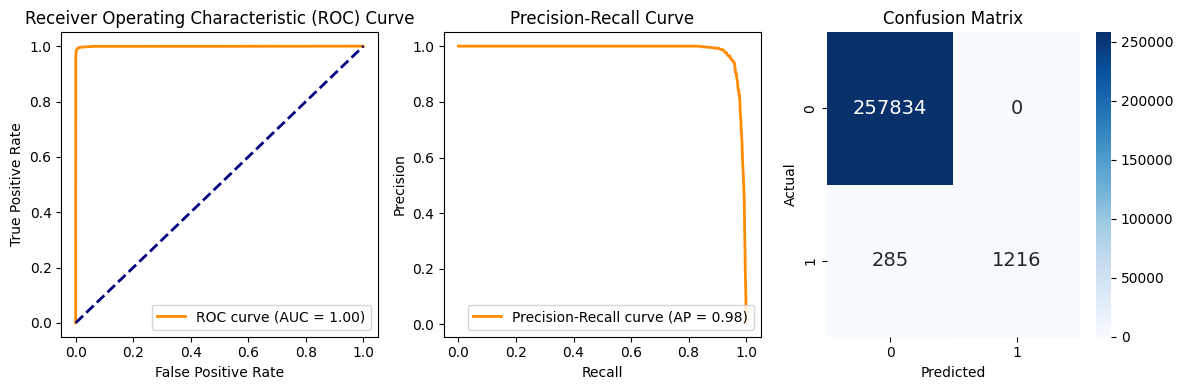

In [32]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_evaluation_curves(model, X, y_true):
    # ROC-AUC Curve
    y_scores = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Precision-Recall Curve
    precision, recall, thresholds_pr = precision_recall_curve(y_true, y_scores)
    average_precision = average_precision_score(y_true, y_scores)

    plt.subplot(1, 3, 2)
    plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')

    # Confusion Matrix
    y_pred = model.predict(X)
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.subplot(1, 3, 3)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

# Usage
plot_evaluation_curves(rf_random, X_valid, y_valid)

Classification Report on the test set:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.02      0.44      0.04      2145

    accuracy                           0.91    555719
   macro avg       0.51      0.68      0.49    555719
weighted avg       0.99      0.91      0.95    555719

Confusion Matrix on the test set:
 [[503565  50009]
 [  1195    950]]


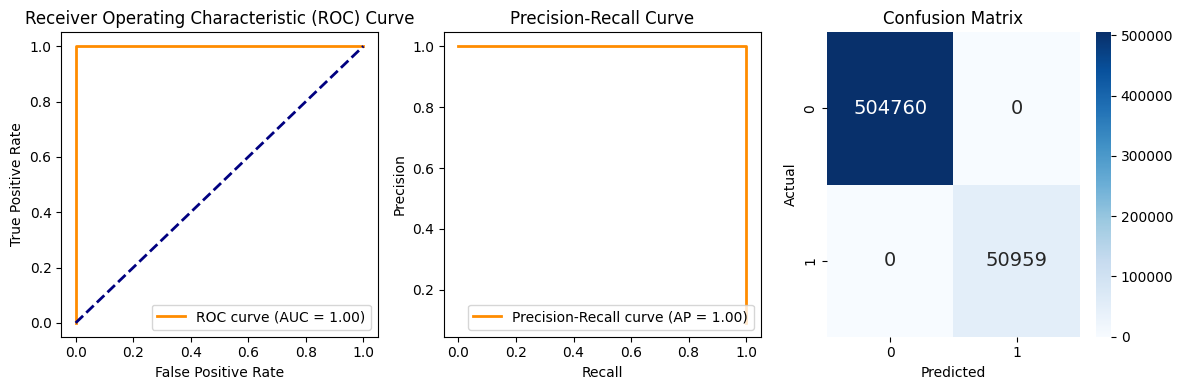

In [39]:
# Make predictions on the provided test_df
y_pred_final = rf_random.predict(test_df[selected_features])
y_proba_final = rf_random.predict_proba(test_df[selected_features])[:, 1]

# Add predictions to the test_df
test_df["Fraud_Proba"] = y_proba_final
test_df["Fraud_Predict"] = y_pred_final

# Store result in a CSV file
result = test_df[["Fraud_Proba", "Fraud_Predict"]]
result.to_csv(r"./PredictFraud_Result.csv", index=False)

# Display classification report
print("Classification Report on the test set:\n", classification_report(test_df['is_fraud'], y_pred_final))

# Display confusion matrix
conf_mat_final = confusion_matrix(y_true=test_df['is_fraud'], y_pred=y_pred_final)
print('Confusion Matrix on the test set:\n', conf_mat_final)

# Plot ROC curve and Precision-Recall curve
plot_evaluation_curves(rf_random, test_df[selected_features], y_pred_final)

In [40]:
# Save the best model to a file
model_filename = 'best_rf_model.joblib'
joblib.dump(rf_random, model_filename)
print(f"Best model saved to {model_filename}")

Best model saved to best_rf_model.joblib
